# Demo 2: Principal Component Analysis

In [1]:
import sys
import os

# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))
# Add the path to sys.path
sys.path.append(func_lib_path)
# Now you can import func_lib
import func_lib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Calculate accuracy, precision, and recall
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
np.random.seed(42)
data = np.random.randn(100, 2)
data[:, 1] = 2 * data[:, 0] + np.random.rand(100)

In [4]:
df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2'] )
df.head()

,Feature 1,Feature 2
0,0.496714,1.870801
1,0.647689,2.036146
2,-0.234153,0.228709
3,1.579213,3.860910
4,-0.469474,-0.579458


In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=['Feature 1', 'Feature 2'])

In [10]:
df_scaled.head()

,Feature 1,Feature 2
0,0.718619,0.944229
1,0.895815,1.040923
2,-0.139186,-0.016075
3,1.989126,2.108055
4,-0.415377,-0.488696


In [11]:
correlation_matrix = df_scaled.corr()

In [12]:
print("Correlation matrix")
print(correlation_matrix)

Correlation matrix
           Feature 1  Feature 2
Feature 1    1.00000    0.98714
Feature 2    0.98714    1.00000


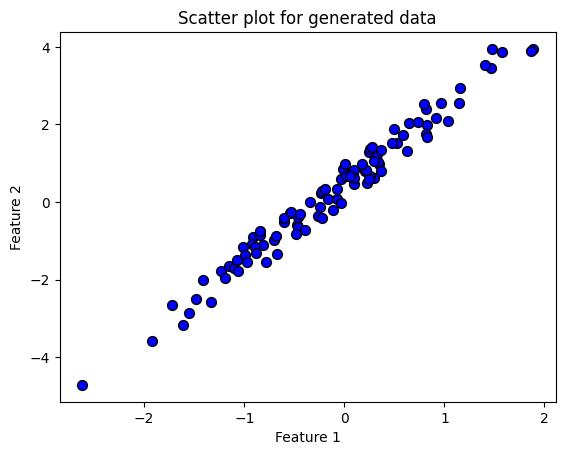

In [13]:
# Scatter plot the data before KMeans clustering
plt.scatter(df['Feature 1'], df['Feature 2'], c='blue', marker='o', edgecolor='k', s=50)
plt.title('Scatter plot for generated data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [14]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)

In [15]:
# Print expalined varice ratio
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

Explained variance ratio:
[0.99357001 0.00642999]


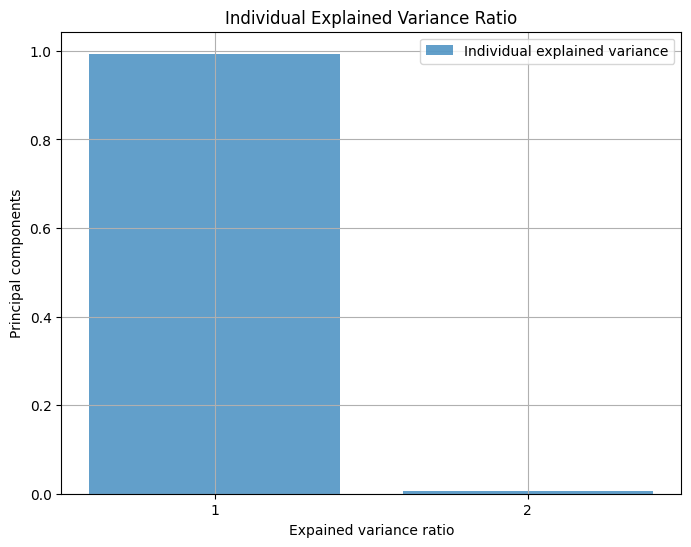

In [18]:
# Visualize individual explaned variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.xlabel('Expained variance ratio')
plt.ylabel('Principal components')
plt.grid(True)
plt.legend(loc='best')
plt.xticks([1, 2]) # Only show ticks at positions 1 and 2
plt.title('Individual Explained Variance Ratio')
plt.show()

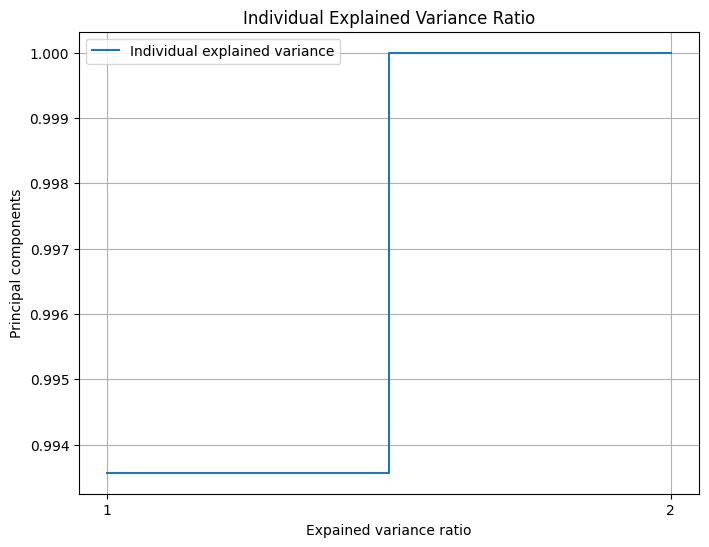

In [20]:
plt.figure(figsize=(8, 6))
plt.step(range(1, 3), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Individual explained variance')
plt.xlabel('Expained variance ratio')
plt.ylabel('Principal components')
plt.grid(True)
plt.legend(loc='best')
plt.xticks([1, 2]) # Only show ticks at positions 1 and 2
plt.title('Individual Explained Variance Ratio')
plt.show()